## Classification And Regression Tree

CART is in the border of startistical learning and machine learning algorithm.

**Advantage**
1. In general CART model is more accurate than Regression model. When the relationship between x and y are non-linear, then CART model is more accurate.
2. Since it's a machine learning algorithm, theoritical assumptions are less.
3. For all types of explanatory and response variables( Continuous & Categorical), we can use CART. Whereas in regression, based on type of response and explanatory variables, we use different types of regression (e.g - OLS, Logistic, dummy variable etc)

**Disadvantage**
1. Model interpretability is less.
2. Model is a set of rules i.e in the form of a tree. Not a mathematical expression.

**Objective**
To develop a predictive model to classify dependant or response metric (y) in terms of independent or exploratory variables (xs).

**When to Use**

xs : Continuous or discrete\
y : Discrete or continuous

**Classification Tree**

When response y is discrete Method = “DecisionTreeClassifier”

**Regression Tree**
When response y is numeric Method = “DecisionTreeRegressor”

---

**Overfit Model:** Overfitting occurs when a statistical model or machine learning algorithm captures the noise of the data. Overfitting occurs when the model or the algorithm fits the data too well. Overfitting a model result in good accuracy for training data set but poor results on new data sets. Such a model is not of any use in the real world as it is not able to predict outcomes for new cases.

**Underfit Model:** Underfitting occurs when a statistical model or machine learning algorithm cannot capture the underlying trend of the data. Intuitively, underfitting occurs when the model or the algorithm does not fit the data well enough. Underfitting is often a result of an excessively simple model. By simple we mean that the missing data is not handled properly, no outlier treatment, removing of irrelevant features or features which do not contribute much to the predictor variable.

**To tackle the problem of overfit or underfit, we do cross-validation**

**Cross Validation**

LOOCV - Keep one observation for test. Train model on remaining observations.

K-fold cross validation - 

If k=5 the dataset will be divided into 5 equal parts and the below process will run 5 times, each time with a different holdout set.
1. Take the group as a holdout or test data set
2. Take the remaining groups as a training data set
3. Fit a model on the training set and evaluate it on the test set
4. Retain the evaluation score and discard the model
At the end of the above process Summarize the skill of the model using the sample of model evaluation scores.

**How to decide the value of k**

The value for k is chosen such that each train/test group of data samples is large enough to be statistically representative of the broader dataset.

Stratified K-fold Cross Validation - 

The splitting of data into folds may be governed by criteria such as ensuring that each fold has the same proportion of observations with a given categorical value (eg. Male - Female Ratio), such as the class outcome value. This is called stratified cross-validation.

`The Accuracy of the model is the average of the accuracy of each fold.`

---

**To get the best CART model we optimize the hyper parameters such that the model does not overfit or underfit**


**Example:**
A marketing company wants to optimize their mailing campaign by sending the brochure mail only to those customers who responded to previous mail campaigns. The profile of customers are given below. Can you develop a rule to identify the profile of customers who are likely to respond (Mail_Respond.csv)?

In [1]:
#Import the packages
import pandas as pd
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
#Display the tree model
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image, display
import pydotplus 


In [3]:
#Import the dataset
data = pd.read_csv('Mail_Respond.csv')

In [4]:
#Explore the dataste
data.head()

,SLNo,District,House_Type,Income,Previous_Customer,Outcome
0,1,1,0,1,0,0
1,2,1,0,1,1,0
2,3,2,0,1,0,1
3,4,0,1,1,0,1
4,5,0,1,0,0,1


In [5]:
#Separate x's and y
x = data.iloc[:,1:5]
y = data.iloc[:,5]

In [6]:
#Specify the model
model = tree.DecisionTreeClassifier(min_samples_split=10)

**max_depth :**

int, default=None

    The maximum depth of the tree. If None, then nodes are expanded until
    all leaves are pure (contains 1 element) or until all leaves contain less than
    min_samples_split samples.





**min_samples_split :**

int or float, default=2

  The minimum number of samples required to split an internal node:
  - If int, then consider `min_samples_split` as the minimum number.
  - If float, then `min_samples_split` is a fraction and
      `ceil(min_samples_split * n_samples)` are the minimum
      number of samples for each split.
      
default=2 means consequent leaves can have max 1 element each.

**min_samples_leaf :**

int or float, default=1
    The minimum number of samples required to be at a leaf node.
    A split point at any depth will only be considered if it leaves at
    least ``min_samples_leaf`` training samples in each of the left and
    right branches.  This may have the effect of smoothing the model,
    especially in regression.

   - If int, then consider `min_samples_leaf` as the minimum number.
   - If float, then `min_samples_leaf` is a fraction and
      `ceil(min_samples_leaf * n_samples)` are the minimum
      number of samples for each node.



In [7]:
#Fit the model
model = model.fit(X=x,y=y)

In [8]:
#Model accuracy
accuracy = model.score(x,y)
round(accuracy,2)

1.0

Model has done the classification with 100 percent accuracy. All the non-diagonal elements in confusion matrix = 0

In [9]:
#Cross Validation
score = cross_val_score(estimator=model,X=x,y=y,cv=4,scoring='accuracy')

**Scoring Criteria**

`y = categorical: 'accuracy'`

`y = continuous: 'neg_mean_squared_error'`


In [10]:
#Cross Validation Accuracy
cv_accracy = score.mean()
round(cv_accracy,2)

0.97

Model accuarcy has decreased from 100 percent to 97 percent. We will go for hyperparameter ooptimization to check if cross validation accuracy goes closer to model accuarcy.

**Hyperparameter tuning**

In [11]:
#Hyper parameter tuning
paramgrid = [{'criterion': ["gini", "entropy"],'min_samples_split':[6,8,10,12,14]}]

In [13]:
#Set up the search
search = GridSearchCV(estimator=model,param_grid=paramgrid,scoring='accuracy',cv=5,verbose=True)

In [14]:
#Run the search on the data
search = search.fit(X=x,y=y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [15]:
#Optimum parameter values
search.best_params_

{'criterion': 'gini', 'min_samples_split': 6}

In [16]:
#Specify optimum model
model = tree.DecisionTreeClassifier(criterion='gini',min_samples_split=6)

In [17]:
#Fit the model to the data
model = model.fit(X=x,y=y)

In [18]:
#Accuracy
accuarcy = model.score(x,y)
round(accuarcy,3)

1.0

In [19]:
#Cross validation accuracy
score = cross_val_score(estimator=model,X=x,y=y,scoring='accuracy',cv=5)
cv_accracy = score.mean()
round(cv_accracy,3)

1.0

We see that cross validation accuracy has increased.

In [21]:
#Predict response
predy = model.predict(X=x)

In [22]:
#Actual vs Predicted table
table = pd.crosstab(y,predy)

In [23]:
#Confusioin matrix
table

col_0,0,1
Outcome,,
0,34,0
1,0,66


In [24]:
# x columns
x_names = x.columns

In [26]:
text_representation = tree.export_text(model)

In [27]:
print(text_representation)

|--- feature_2 <= 0.50
|   |--- feature_0 <= 0.50
|   |   |--- feature_3 <= 0.50
|   |   |   |--- class: 1
|   |   |--- feature_3 >  0.50
|   |   |   |--- class: 0
|   |--- feature_0 >  0.50
|   |   |--- class: 1
|--- feature_2 >  0.50
|   |--- feature_0 <= 1.50
|   |   |--- feature_0 <= 0.50
|   |   |   |--- feature_3 <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  0.50
|   |   |   |   |--- class: 0
|   |   |--- feature_0 >  0.50
|   |   |   |--- class: 0
|   |--- feature_0 >  1.50
|   |   |--- class: 1



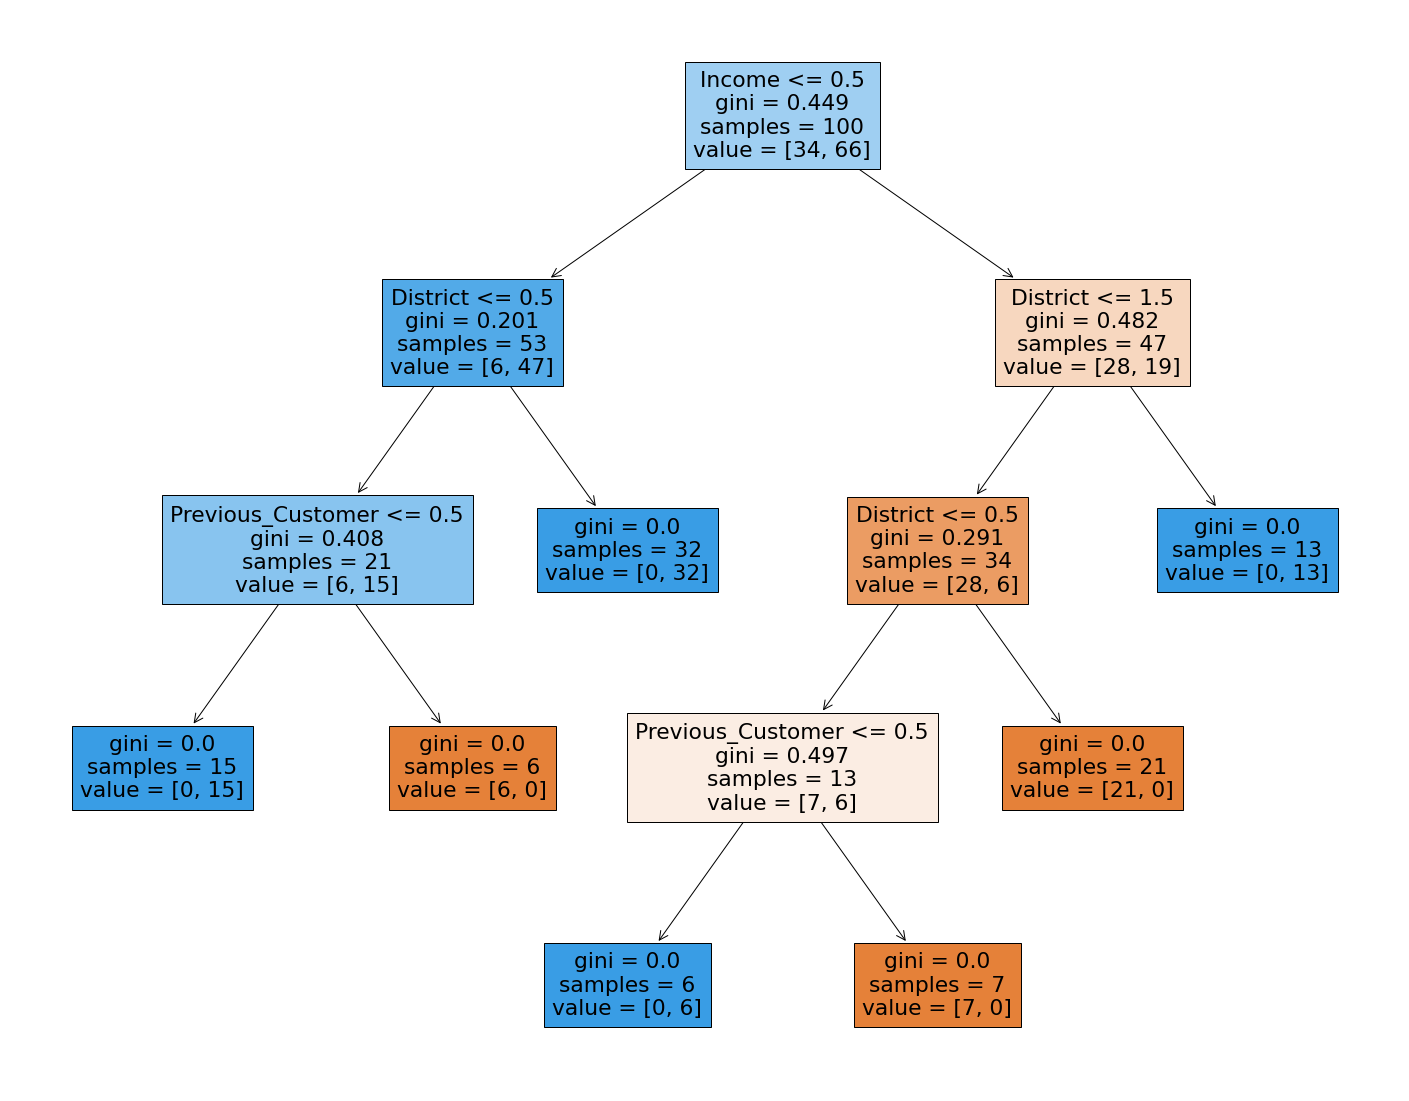

In [28]:
# Plot decision tree
plt.figure(figsize=(25,20)) #Create figure size
tree.plot_tree(model,feature_names=x_names,filled=True) #Create plot
plt.show()